In [17]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import pydicom as dicom
import dicom_numpy
import SimpleITK as sitk
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from copy import deepcopy
from ct_charachterization import run_third_algorithm_expectation_at_the_beginning, \
    run_third_algorithm_gamma_instead_of_pi, run_third_algorithm_expectation_at_the_end, run_first_algorithm
from ct_charachterization.utility.utils import expand, central_gamma_log_pdf

In [18]:
%matplotlib inline

# Selecting two different tissues

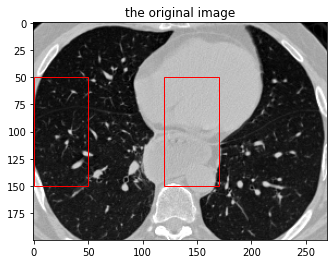

In [19]:
import matplotlib.patches as patches


img = np.load(f'../resources/sample/img.npy')[90:97, 75:275, 50:320]
fig1, ax1 = plt.subplots(1)
ax1.imshow(img[3, :, :], cmap='gray')
plt.title("the original image")
rect1 = patches.Rectangle((0, 50),50,100,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect1)
rect2 = patches.Rectangle((120, 50),50,100,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect2)
plt.show()

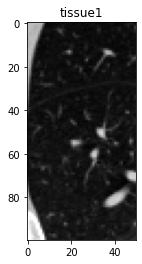

In [20]:
tissue1 = img[:, 50:150, 0:50]
plt.imshow(tissue1[3, :, :], cmap='gray')
plt.title("tissue1")
plt.show()

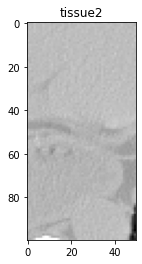

In [21]:
tissue2 = img[:, 50:150, 120:170]
plt.imshow(tissue2[3, :, :], cmap='gray')
plt.title("tissue2")
plt.show()

In [22]:
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])

delta = -1001
# is for air

# Running the first algorithm (Global non-Central Gamma)
We assume the whole 2 crops as a single neighborhood.

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 1.73333614864385e-83
	mean: 0.11111111111111109
	max: 0.9749253885413849
PI:
	min: 0.004389077390428879
	mean: 0.1111111111111111
	max: 0.43517788488484493
_______________________________
iteration: 1, error: 0.02812879540849487
_______________________________
GAMMA:
	min: 1.2151638869561948e-84
	mean: 0.11111111111111109
	max: 0.823404255483345
PI:
	min: 0.004389077390428879
	mean: 0.1111111111111111
	max: 0.43517788488484493
_______________________________
iteration: 2, error: 1.6653038474340975e-15
_______________________________
GAMMA:
	min: 1.2151638869561948e-84
	mean: 0.11111111111111109
	max: 0.8234042554833435
PI:
	min: 0.00020698069209592292
	mean: 0.1111111111111111
	max: 0.7248526355394628
_______________________________
iteration: 3, error: 0.1532387476852497
_______________________________
GAMMA:
	min: 1.3082069237193016e-85
	mean: 0.1111111111111111
	max: 0.9189873138314516
PI:
	min: 0.00020698069209593352
	mean: 0.1111111111111111
	max: 0.7248526355394629
_

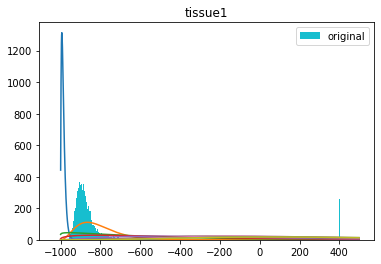

In [23]:
global_theta, global_gamma = run_first_algorithm(tissue1, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 1, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat1 = tissue1.flatten()
plt.hist(flat1, bins=list(np.arange(-1030, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue1")
plt.show()

On each iteration, we can seen the min, mean, and max values over the whole matrices of probabilities - The prior probability (PI) and the posterior probability (GAMMA). After resolving numerical issues, we do not see any zeros (Also mean value always should be 0.111...., because we have 9 components the mean will be 1/9).

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 1.73333614864385e-83
	mean: 0.1111111111111111
	max: 0.5810276244959468
PI:
	min: 2.1734496788819726e-05
	mean: 0.1111111111111111
	max: 0.16461131182497485
_______________________________
iteration: 1, error: 0.8996550047533075
_______________________________
GAMMA:
	min: 4.632525496712852e-146
	mean: 0.1111111111111111
	max: 0.9147414320916804
PI:
	min: 2.1734496788819726e-05
	mean: 0.1111111111111111
	max: 0.16461131182497485
_______________________________
iteration: 2, error: 2.0228646127120215e-14
_______________________________
GAMMA:
	min: 4.632525496712589e-146
	mean: 0.1111111111111111
	max: 0.9147414320916836
PI:
	min: 3.013776853049219e-08
	mean: 0.1111111111111111
	max: 0.37707390117420725
_______________________________
iteration: 3, error: 0.6687464365564242
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.946798739363353
PI:
	min: 3.013776853049112e-08
	mean: 0.1111111111111111
	max: 0.37707390117420725
___________________

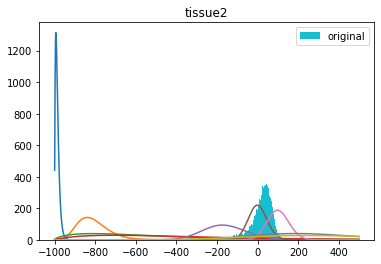

In [24]:
global_theta, global_gamma = run_first_algorithm(tissue2, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 1, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat2 = tissue2.flatten()
plt.hist(flat2, bins=list(np.arange(-1000, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue2")
plt.show()


# This is cool
At least, we know that the algorithm works fine, and on the different types of tissues, it can model the distribution.

But! There is a problem with the second tissue. The blue and orange lines act kinda weird. 
But maybe, it is because they are too close to shifted zero (we have shifted x=0 using delta=-1030 to x=-1030, and the mean of the first two components are very close to this value; -987 and -810). Looking at the plots below gives the idea about what I am trying to say:

![](../resources/figs/gamma_exp1.png)

![](../resources/figs/gamma_exp2.png)

![](../resources/figs/gamma_exp3.png)

# So
It is kina confusing! Most of the tissue2's voxels are between -200 and 200. why the pdf of the blue line acts like that? Humm, maybe it is because its integral from zero to +inf should be 1, and its mean is too close to delta.

But, maybe we can make the situation better by making a distance between the delta and the mean value of the first component. I am going to set delta=-10,000

In [25]:
delta = -10000

GAMMA:
	min: 0.10945512390864993
	mean: 0.1111111111111111
	max: 0.11199847670471923
PI:
	min: 0.11023090303974623
	mean: 0.1111111111111111
	max: 0.11169803049812321
_______________________________
iteration: 1, error: 0.9967545925250707
_______________________________
GAMMA:
	min: 3.192554496661671e-06
	mean: 0.1111111111111111
	max: 0.3021746642896338
PI:
	min: 0.11023090303974623
	mean: 0.1111111111111111
	max: 0.11169803049812321
_______________________________
iteration: 2, error: 5.564815624114821e-13
_______________________________
GAMMA:
	min: 3.1925544966617392e-06
	mean: 0.1111111111111111
	max: 0.3021746642895726
PI:
	min: 0.04436576276951489
	mean: 0.1111111111111111
	max: 0.27394125044978934
_______________________________
iteration: 3, error: 4.571829820289888
_______________________________
GAMMA:
	min: 6.488143817182728e-34
	mean: 0.11111111111111109
	max: 0.7125060976953678
PI:
	min: 0.044365762769512325
	mean: 0.1111111111111111
	max: 0.27394125044976814
____________

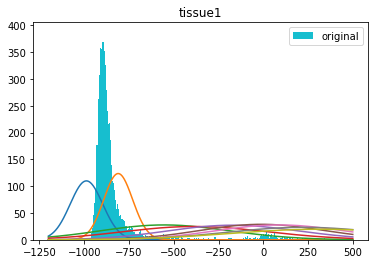

In [26]:
global_theta, global_gamma = run_first_algorithm(tissue1, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(-1200, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat1 = tissue1.flatten()
plt.hist(flat1, bins=list(np.arange(-1000, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue1")
plt.show()

GAMMA:
	min: 0.10945512390864993
	mean: 0.11111111111111113
	max: 0.11194508781114561
PI:
	min: 0.11015077629947409
	mean: 0.1111111111111111
	max: 0.11143122666784028
_______________________________
iteration: 1, error: 1.5145026223670905
_______________________________
GAMMA:
	min: 1.1823131671136898e-31
	mean: 0.11111111111111113
	max: 0.4074722834355486
PI:
	min: 0.11015077629947409
	mean: 0.1111111111111111
	max: 0.11143122666784028
_______________________________
iteration: 2, error: 5.2377883534520445e-14
_______________________________
GAMMA:
	min: 1.1823131671136898e-31
	mean: 0.11111111111111113
	max: 0.4074722834355508
PI:
	min: 0.020809431775514965
	mean: 0.1111111111111111
	max: 0.34688424162767156
_______________________________
iteration: 3, error: 1.761353144050605
_______________________________
GAMMA:
	min: 3.5317315419609217e-91
	mean: 0.1111111111111111
	max: 0.7774775064553012
PI:
	min: 0.020809431775515103
	mean: 0.1111111111111111
	max: 0.34688424162767395
______

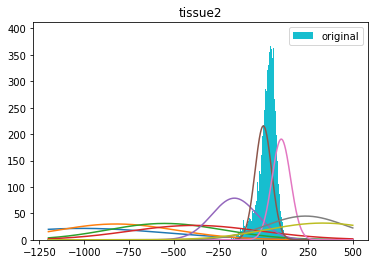

In [27]:
global_theta, global_gamma = run_first_algorithm(tissue2, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(-1200, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat2 = tissue2.flatten()
plt.hist(flat2, bins=list(np.arange(-1030, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue2")
plt.show()


# Better!
So the delta value really matters! It would be better for fitting if we choose a big negative delta.
# Question 1 I Asked Brian
Do you think it is ok to do this? I mean, the result is better for fitting the distribution, but I am just acting like a brute force algorithm and trying all the possible ways. 

## Brian's Answer:

![](../resources/figs/q1_b.png)


So, lets try:
Min hu value is -1000:

Text(0.5, 1.0, 'the big original image')

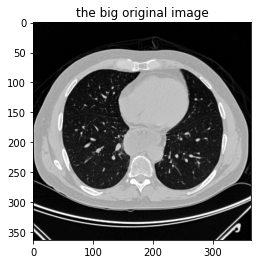

In [28]:
b_img = np.load(f'../resources/sample/img.npy')
fig1, ax1 = plt.subplots(1)
ax1.imshow(b_img[93, :, :], cmap='gray')
plt.title("the big original image")

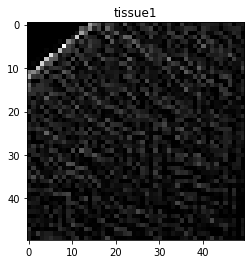

In [29]:
finding_air = b_img[93, 0:50, 0:50]
plt.imshow(finding_air[:, :], cmap='gray')
plt.title("tissue1")
plt.show()

In [30]:
min_val = np.min(finding_air)
max_val = np.max(finding_air)
print(min_val, max_val)

-1000 -882


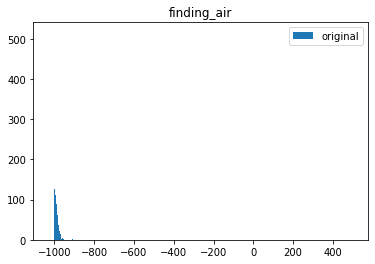

In [31]:
flat1 = finding_air.flatten()
plt.hist(flat1, bins=list(np.arange(-1030, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("finding_air")
plt.show()

# Air = -1000
OK now we know that the hu value for air is -1000.

In [32]:
# Shifting m_9 values and fixing delta near the least mu
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340]) + (-1000 + 987)
delta = -1001

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.7070066300230299
PI:
	min: 1.0785314437259996e-08
	mean: 0.1111111111111111
	max: 0.44069150669758245
_______________________________
iteration: 1, error: 0.0319535958762245
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.8350100247960311
PI:
	min: 1.0785314437259996e-08
	mean: 0.1111111111111111
	max: 0.44069150669758245
_______________________________
iteration: 2, error: 0.0
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.8350100247960311
PI:
	min: 2.4995818331341258e-15
	mean: 0.1111111111111111
	max: 0.7305865865688935
_______________________________
iteration: 3, error: 0.8367981268613897
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111113
	max: 0.9224668328808984
PI:
	min: 2.4995818331341258e-15
	mean: 0.1111111111111111
	max: 0.7305865865688935
_______________________________
iteration: 4, error: 3.131543157427764e-16
______________

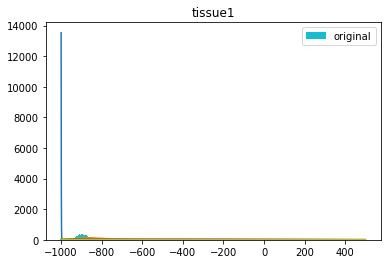

In [41]:
global_theta, global_gamma = run_first_algorithm(tissue1, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 1, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat1 = tissue1.flatten()
plt.hist(flat1, bins=list(np.arange(delta , 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue1")
plt.show()

It seems that the first mu value has a big rise at its first values. We can start plotting the diagram from different place, like delta + 10.

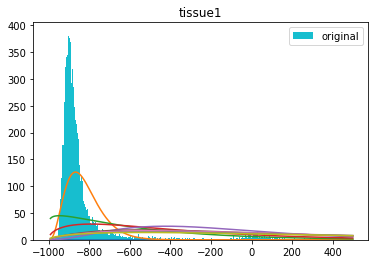

In [42]:
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 10, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat1 = tissue1.flatten()
plt.hist(flat1, bins=list(np.arange(delta , 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue1")
plt.show()

Better, but still I think the first mu can cause some problems. Ok lets go on.

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.6571050213684003
PI:
	min: 8.98369971890959e-34
	mean: 0.1111111111111111
	max: 0.16586128866407743
_______________________________
iteration: 1, error: 0.9038640579185778
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.9119137223262798
PI:
	min: 8.98369971890959e-34
	mean: 0.1111111111111111
	max: 0.16586128866407743
_______________________________
iteration: 2, error: 5.0594713372800446e-15
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.9119137223262798
PI:
	min: 3.3036757964694857e-65
	mean: 0.1111111111111111
	max: 0.350703145475061
_______________________________
iteration: 3, error: 0.544357983994872
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.9266267390748862
PI:
	min: 3.3036757964694857e-65
	mean: 0.1111111111111111
	max: 0.3507031454750616
_______________________________
iteration: 4, error: 5.973897199146835e-16
_

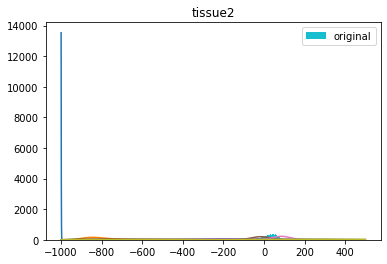

In [43]:
global_theta, global_gamma = run_first_algorithm(tissue2, mu_9, delta=delta, neighborhood_size=0, max_iter=10, tol=-1,
                                                     non_central=True)
global_alpha = global_theta[1, ...]
global_beta = global_theta[2, ...]
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 1, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat2 = tissue2.flatten()
plt.hist(flat2, bins=list(np.arange(delta, 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue2")
plt.show()


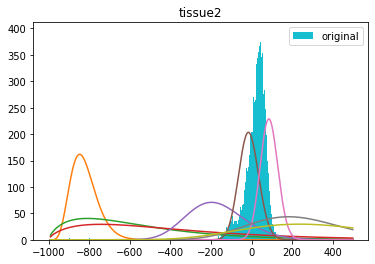

In [45]:
for j in range(len(mu_9)):
    wanted_alpha = global_alpha[j, ...]
    wanted_beta = global_beta[j, ...]
    xs = np.arange(delta + 10, 500, 1) - delta
    ys = 25000 * np.exp(central_gamma_log_pdf(xs, wanted_alpha, wanted_beta).ravel())
    plt.plot(xs + delta, ys, '-')
flat1 = tissue2.flatten()
plt.hist(flat1, bins=list(np.arange(delta , 500, 1)), label='original')
plt.legend(loc='upper right')
plt.title("tissue2")
plt.show()

## OK but still first two tissues can be problematic

### I am going to return the mu_9 and delt values, then compare the results in both cases:

In [46]:
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])
delta = -1030

# Stabilization
Here are some minor improvements:
1. I am using 3d version
2. neighborhood shape is 7\*7\*7

Running the algorithm for tissue1, and using the below approach to deal with paper's incompleteness:
![](../resources/figs/beg.png)

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/utility/utils.py:146: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  big_img[big_slices] = small_img[small_slices]
/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:12: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (onp.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


GAMMA:
	min: 2.0461313269668658e-26
	mean: 0.11111111111111109
	max: 0.79275160874333
PI:
	min: 0.03984422497352866
	mean: 0.11111111111111113
	max: 0.36505288759328347
_______________________________
iteration: 1, error: 0.12796558770136293
_______________________________
GAMMA:
	min: 2.36944928310065e-26
	mean: 0.11111111111111115
	max: 0.7678022495824536
PI:
	min: 0.03984422497352866
	mean: 0.11111111111111113
	max: 0.36505288759328347
_______________________________
iteration: 2, error: 0.0
_______________________________
GAMMA:
	min: 2.36944928310065e-26
	mean: 0.11111111111111115
	max: 0.7678022495824536
PI:
	min: 0.009739988370670949
	mean: 0.11111111111111105
	max: 0.6710130348105638
_______________________________
iteration: 3, error: 0.22512192669088524
_______________________________
GAMMA:
	min: 2.112234346377582e-26
	mean: 0.11111111111111102
	max: 0.9031107640284527
PI:
	min: 0.009739988370670949
	mean: 0.11111111111111105
	max: 0.6710130348105638
________________________

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  theta_before_expansion = onp.array([initial_pi, initial_alpha, initial_beta])


GAMMA:
	min: 2.2107054370015114e-26
	mean: 0.11111111111111097
	max: 0.7969177177814054
PI:
	min: 3.688847454373422e-09
	mean: 0.1111111111111111
	max: 0.42867129865800846
_______________________________
iteration: 1, error: 0.2446792737746051
_______________________________
GAMMA:
	min: 1.8203063965258616e-34
	mean: 0.11111111111111087
	max: 0.8474596996411872
PI:
	min: 3.688847454373422e-09
	mean: 0.1111111111111111
	max: 0.42867129865800846
_______________________________
iteration: 2, error: 7.991579148678048e-15
_______________________________
GAMMA:
	min: 1.8203063965258616e-34
	mean: 0.11111111111111087
	max: 0.8474596996411872
PI:
	min: 2.8837449998763743e-16
	mean: 0.11111111111111113
	max: 0.7887473207274683
_______________________________
iteration: 3, error: 0.1729481237634877
_______________________________
GAMMA:
	min: 3.503944435212648e-71
	mean: 0.11111111111111095
	max: 0.9600289588766197
PI:
	min: 2.8837449998763743e-16
	mean: 0.1111111111111111
	max: 0.78874732072746

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_third_algorithm.py:131: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_stab = (constant_c * (onp.sqrt(y[y_slices]) - first_local_sample_conditioned_moment) / onp.sqrt(


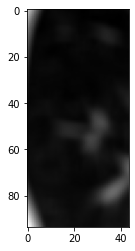

In [47]:
resul = run_third_algorithm_expectation_at_the_beginning(y=tissue1, mu=mu_9, neighborhood_size=7, delta=delta,
                                                         max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()

P.S.1: First 10 iterations are for global non-central gamma algorithm and the second 10 iterations are related to local non-central gamma algorithm.


P.S.2: As you can see, after iteration 7, some values become zero. But, if you look at the previous one, the min value is `6.346167187880914e-162`, so I think it is reasonable to become zero.

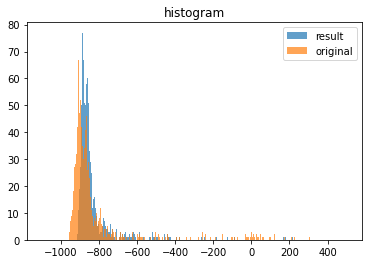

In [38]:
origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() + delta
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

# Trying with new mu_9 and delta value

GAMMA:
	min: 0.0
	mean: 0.11111111111111097
	max: 0.7070066300230312
PI:
	min: 1.117580799616213e-08
	mean: 0.11111111111111113
	max: 0.45578559299155685
_______________________________
iteration: 1, error: 0.03178553773427065
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111115
	max: 0.840285545179047
PI:
	min: 1.117580799616213e-08
	mean: 0.11111111111111113
	max: 0.45578559299155685
_______________________________
iteration: 2, error: 6.054159198101365e-17
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111115
	max: 0.840285545179047
PI:
	min: 2.6402197066246206e-15
	mean: 0.1111111111111111
	max: 0.7593708051456649
_______________________________
iteration: 3, error: 0.1434215694083728
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111119
	max: 0.9348860129837606
PI:
	min: 2.640219706624639e-15
	mean: 0.11111111111111109
	max: 0.7593708051456646
_______________________________
iteration: 4, error: 1.8461853649677496e

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:54: RuntimeWarning: invalid value encountered in true_divide
  right_hand_side = ((first_numerator_summation - second_numerator_summation) / denominator_summation) - 1


GAMMA:
	min: 0.0
	mean: 0.11111111111111109
	max: 0.8915230841664497
PI:
	min: 0.0
	mean: 0.1111111111111111
	max: 0.8450921719096676
_______________________________
iteration: 3, error: 0.19467984189329512
_______________________________


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm_using_log.py:29: RuntimeWarning: divide by zero encountered in log
  gamma_numerators[..., j] = onp.log(pi) + central_gamma_log_pdf(y, alpha=alpha, beta=beta)


GAMMA:
	min: 0.0
	mean: 0.11111111111111102
	max: 0.9698796056487681
PI:
	min: 0.0
	mean: 0.1111111111111111
	max: 0.8450921719096676
_______________________________
iteration: 4, error: 1.3410210454631317e-14
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111104
	max: 0.9698796056487681
PI:
	min: 0.0
	mean: 0.11111111111111113
	max: 0.9518478837531051
_______________________________
iteration: 5, error: 0.19455238880068954
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111131
	max: 0.99036428759434
PI:
	min: 0.0
	mean: 0.1111111111111111
	max: 0.9518478837531051
_______________________________
iteration: 6, error: 1.440861593589138e-14
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111131
	max: 0.99036428759434
PI:
	min: 0.0
	mean: 0.1111111111111111
	max: 0.9853660711447233
_______________________________
iteration: 7, error: 0.20384420951253734
_______________________________
GAMMA:
	min: 0.0
	mean: 0.1111111111111111

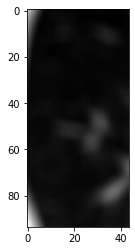

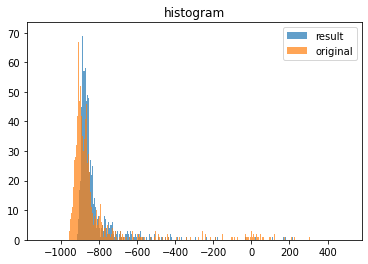

In [50]:
# Shifting m_9 values and fixing delta near the least mu
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340]) + (-1000 + 987)
delta = -1001



resul = run_third_algorithm_expectation_at_the_beginning(y=tissue1, mu=mu_9, neighborhood_size=7, delta=delta,
                                                         max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()



origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() + delta
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

# It seems there is no big improvement

# Now, trying the second approach:

![](../resources/figs/end.png)

GAMMA:
	min: 2.0461313269668658e-26
	mean: 0.11111111111111109
	max: 0.79275160874333
PI:
	min: 0.03984422497352866
	mean: 0.11111111111111113
	max: 0.36505288759328347
_______________________________
iteration: 1, error: 0.12796558770136293
_______________________________
GAMMA:
	min: 2.36944928310065e-26
	mean: 0.11111111111111115
	max: 0.7678022495824536
PI:
	min: 0.03984422497352866
	mean: 0.11111111111111113
	max: 0.36505288759328347
_______________________________
iteration: 2, error: 0.0
_______________________________
GAMMA:
	min: 2.36944928310065e-26
	mean: 0.11111111111111115
	max: 0.7678022495824536
PI:
	min: 0.009739988370670949
	mean: 0.11111111111111105
	max: 0.6710130348105638
_______________________________
iteration: 3, error: 0.22512192669088524
_______________________________
GAMMA:
	min: 2.112234346377582e-26
	mean: 0.11111111111111102
	max: 0.9031107640284527
PI:
	min: 0.009739988370670949
	mean: 0.11111111111111105
	max: 0.6710130348105638
________________________

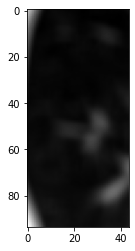

In [51]:
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])
delta = -1030

resul = run_third_algorithm_expectation_at_the_end(y=tissue1, mu=mu_9, neighborhood_size=6, delta=delta,
                                                   max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()

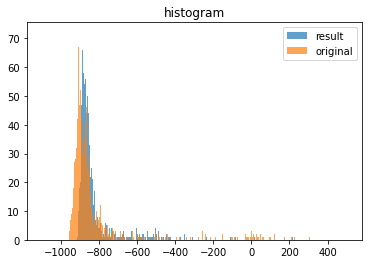

In [52]:
origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() + delta
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

# Trying with new mu_9 and delta value

GAMMA:
	min: 0.0
	mean: 0.11111111111111097
	max: 0.7070066300230312
PI:
	min: 1.117580799616213e-08
	mean: 0.11111111111111113
	max: 0.45578559299155685
_______________________________
iteration: 1, error: 0.03178553773427065
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111115
	max: 0.840285545179047
PI:
	min: 1.117580799616213e-08
	mean: 0.11111111111111113
	max: 0.45578559299155685
_______________________________
iteration: 2, error: 6.054159198101365e-17
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111115
	max: 0.840285545179047
PI:
	min: 2.6402197066246206e-15
	mean: 0.1111111111111111
	max: 0.7593708051456649
_______________________________
iteration: 3, error: 0.1434215694083728
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111119
	max: 0.9348860129837606
PI:
	min: 2.640219706624639e-15
	mean: 0.11111111111111109
	max: 0.7593708051456646
_______________________________
iteration: 4, error: 1.8461853649677496e

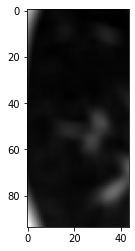

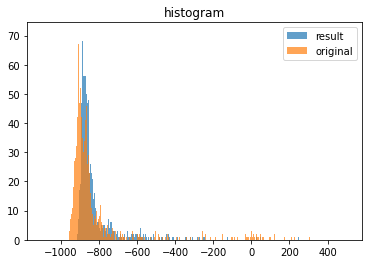

In [54]:
# Shifting m_9 values and fixing delta near the least mu
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340]) + (-1000 + 987)
delta = -1001


resul = run_third_algorithm_expectation_at_the_end(y=tissue1, mu=mu_9, neighborhood_size=6, delta=delta,
                                                   max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()



origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() + delta
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

# Again...

# Now, the approach that was working with no true explanation (and I just found it with brute-forcing):

![](../resources/figs/gam_pi.png)

GAMMA:
	min: 2.0461313269668658e-26
	mean: 0.11111111111111109
	max: 0.79275160874333
PI:
	min: 0.03984422497352866
	mean: 0.11111111111111113
	max: 0.36505288759328347
_______________________________
iteration: 1, error: 0.12796558770136293
_______________________________
GAMMA:
	min: 2.36944928310065e-26
	mean: 0.11111111111111115
	max: 0.7678022495824536
PI:
	min: 0.03984422497352866
	mean: 0.11111111111111113
	max: 0.36505288759328347
_______________________________
iteration: 2, error: 0.0
_______________________________
GAMMA:
	min: 2.36944928310065e-26
	mean: 0.11111111111111115
	max: 0.7678022495824536
PI:
	min: 0.009739988370670949
	mean: 0.11111111111111105
	max: 0.6710130348105638
_______________________________
iteration: 3, error: 0.22512192669088524
_______________________________
GAMMA:
	min: 2.112234346377582e-26
	mean: 0.11111111111111102
	max: 0.9031107640284527
PI:
	min: 0.009739988370670949
	mean: 0.11111111111111105
	max: 0.6710130348105638
________________________

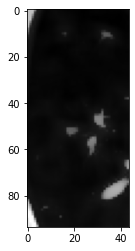

In [55]:
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])
delta = -1030

resul = run_third_algorithm_gamma_instead_of_pi(y=tissue1, mu=mu_9, neighborhood_size=6, delta=delta,
                                                max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()

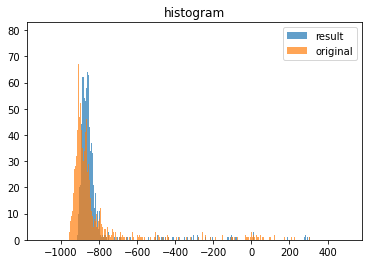

In [56]:
origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() + delta
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

# Trying with new mu_9 and delta value

GAMMA:
	min: 0.0
	mean: 0.11111111111111097
	max: 0.7070066300230312
PI:
	min: 1.117580799616213e-08
	mean: 0.11111111111111113
	max: 0.45578559299155685
_______________________________
iteration: 1, error: 0.03178553773427065
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111115
	max: 0.840285545179047
PI:
	min: 1.117580799616213e-08
	mean: 0.11111111111111113
	max: 0.45578559299155685
_______________________________
iteration: 2, error: 6.054159198101365e-17
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111115
	max: 0.840285545179047
PI:
	min: 2.6402197066246206e-15
	mean: 0.1111111111111111
	max: 0.7593708051456649
_______________________________
iteration: 3, error: 0.1434215694083728
_______________________________
GAMMA:
	min: 0.0
	mean: 0.11111111111111119
	max: 0.9348860129837606
PI:
	min: 2.640219706624639e-15
	mean: 0.11111111111111109
	max: 0.7593708051456646
_______________________________
iteration: 4, error: 1.8461853649677496e

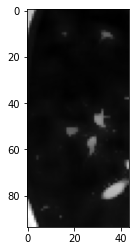

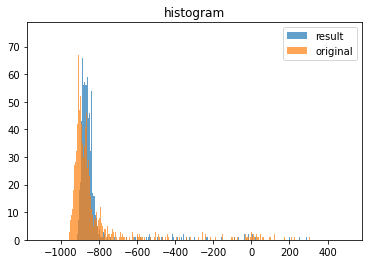

In [57]:
# Shifting m_9 values and fixing delta near the least mu
mu_9 = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340]) + (-1000 + 987)
delta = -1001


resul = run_third_algorithm_gamma_instead_of_pi(y=tissue1, mu=mu_9, neighborhood_size=6, delta=delta,
                                                max_iter=10, tol=-1, constant_c=2, non_central=True)
plt.imshow(resul[0, :, :], cmap='gray')
plt.show()


origi = tissue1[3:-3, 3:-3]
flat_resul = resul.flatten() + delta
flat_origi = origi.flatten()
ax = plt.subplot(1, 1, 1)
bins = list(np.arange(-1100, 500, 1))
ax.hist(flat_resul, bins=bins, alpha=0.7, label='result')
ax.hist(flat_origi, bins=bins, alpha=0.7, label='original')
plt.legend(loc='upper right')
plt.title("histogram")
plt.show()

# About using JAX
JAX has some limitations, and we cannot use NumPy's SciPy with it. And the SciPy of their own is a work-in-progress project. I was trying to implement it but found out that I should get my hands dirty with the whole Jax project (and I was going to learn about it for a couple of days, but now, I think it takes time)

![](../resources/figs/jax_issue.png)




# I feel stuck

At this point, I feel a little bit stuck, and I do not know what I should do for the next steps to make one of the first two stabilization algorithms work (the third one works, with no reason). Do you have any idea?